In [351]:
import numpy as np
import pandas as pd
from scipy.stats import entropy

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.figsize'] = [7,8]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 17
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10

sns.set_context('talk')

from pprint import pprint

import imp

In [27]:
local_folder='../../Dropbox/OII/Volatility/volatility-shared/data/UK agendas media data/'

In [18]:
# Load all datasets/waves as pandas dataframes and  pandas StataReader objects
filenames = glob(local_folder+'Jan1960-April1966/*.dta')
dataframes = [pd.read_stata(i, convert_categoricals=False) for i in filenames]
labels = [pd.read_stata(i, iterator=True) for i in filenames]

In [30]:
df = pd.read_csv(local_folder+'UK_Times_1960_to_2008.csv', encoding='latin1')
df.head()

,id,year,speech_year,date,description,subtitle,words,majortopic,filter_international,filter_duplicate
0,1,1960,52,06/01/1960,Engineering Unions Press Pay And Hours Claim,Apparition Of Inflationary Spiral Laid,1042.0,5,0,0
1,2,1960,52,06/01/1960,In Disaster Pit,NaN,796.0,8,0,0
2,3,1960,52,06/01/1960,Peeping Toms,NaN,159.0,12,0,0
3,4,1960,52,06/01/1960,Police Officer Praised For Car Struggle,NaN,173.0,12,0,0
4,5,1960,52,06/01/1960,540 Tugmen End Strike,Employers Agree To Supply Deck Boys,411.0,10,0,0


In [43]:
print(sorted(df.majortopic.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 91, 99]


In [44]:
df[df.majortopic==0]

,id,year,speech_year,date,description,subtitle,words,majortopic,filter_international,filter_duplicate
21792,21793,2008,102,17/12/2008,Inside today,NaN,10.0,0,0,0
21793,21794,2008,102,17/12/2008,Inside today,NaN,10.0,0,0,1
21822,21823,2008,102,24/12/2008,Inside,NaN,5.0,0,0,0
21823,21824,2008,102,24/12/2008,Online,NaN,8.0,0,0,0
21824,21825,2008,102,24/12/2008,Online,NaN,8.0,0,0,1
21825,21826,2008,102,24/12/2008,Online,NaN,8.0,0,0,1


In [56]:
set(df.majortopic).difference(set(code_dic.keys()))

{0, 9, 22, 23, 32}

In [72]:
all_headlines = df[ (df.majortopic != 0) & (df.majortopic < 90) ]
all_headlines = all_headlines.filter(['date','majortopic'])
all_headlines.head()

,date,majortopic
0,06/01/1960,5
1,06/01/1960,8
2,06/01/1960,12
3,06/01/1960,12
4,06/01/1960,10


In [48]:
code_dic = {
1 : 'Macroeconomics',
2 : 'Civil Rights, Minority Issues (*Immigration), and Civil Liberties',
3 : 'Health',
4 : 'Agriculture',
5 : 'Labour and Employment',
6 : 'Education',
7 : 'Environment',
8 : 'Energy',
10 : 'Transportation',
12 : 'Law, Crime, and Family Issues',
13 : 'Social Welfare',
14 : 'Community Development, Planning and Housing Issues',
15 : 'Banking, Finance, and Domestic Commerce',
16 : 'Defence',
17 : 'Space, Science, Technology and Communications',
18 : 'Foreign Trade',
19 : 'International Affairs and Foreign Aid',
20 : 'Government Operations',
21 : 'Public Lands, Water Management, Colonial and Territorial Issues',
24 : 'Regional and Local Government Administration',
26 : 'Weather and Natural Disasters',
27 : 'Fires',
28 : 'Arts, History & Culture and Entertainment',
29 : 'Sports and Recreation',
30 : 'Death Notices',
31 : 'Churches and Religion',
33 : 'Political Parties',
34 : 'Human Interest',
90 : 'News in Brief',
91 : 'Picture Gallery',
92 : 'Display Advertising',
93 : 'Index',
99 : 'Other, Miscellaneous and Uncodable'
}

all_headlines.majortopic.apply( lambda x: code_dic[x] )

In [169]:
issues_per_article = pd.DataFrame()
issues_per_article['date'] = all_headlines['date']

for m in sorted(all_headlines.majortopic.unique()):
    issues_per_article['Issue %d' % m] = [ int(i) for i in all_headlines.majortopic == m ]
    
issues_per_article.head()

,date,Issue 1,Issue 2,Issue 3,Issue 4,Issue 5,Issue 6,Issue 7,Issue 8,Issue 9,...,Issue 24,Issue 26,Issue 27,Issue 28,Issue 29,Issue 30,Issue 31,Issue 32,Issue 33,Issue 34
0,06/01/1960,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,06/01/1960,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,06/01/1960,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,06/01/1960,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,06/01/1960,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
from dateutil.parser import parse
issues_per_article['date'] = issues_per_article['date'].apply(lambda x: parse(x, dayfirst=True))

In [171]:
issues_per_date = issues_per_article.groupby('date').sum().sort_index(axis=0)
issues_per_date.head()

,Issue 1,Issue 2,Issue 3,Issue 4,Issue 5,Issue 6,Issue 7,Issue 8,Issue 9,Issue 10,...,Issue 24,Issue 26,Issue 27,Issue 28,Issue 29,Issue 30,Issue 31,Issue 32,Issue 33,Issue 34
date,,,,,,,,,,,,,,,,,,,,,
1960-01-06,0,0,0,0,1,0,0,1,0,4,...,1,0,1,0,1,0,0,0,0,2
1960-01-13,0,0,0,0,2,0,0,1,0,5,...,0,0,0,0,0,0,0,0,0,0
1960-01-20,0,0,1,0,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,1
1960-01-27,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1960-02-03,0,0,0,0,0,0,2,0,0,2,...,0,0,0,1,0,0,0,0,0,1


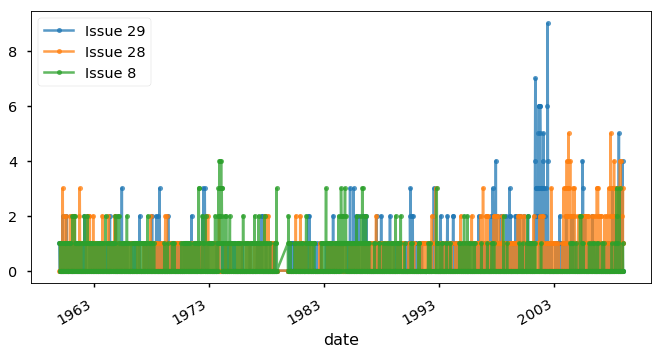

In [187]:
issues = np.random.choice(issues_per_date.keys(), 3)

issues_per_date[issues].plot(style='.-', figsize=(10,5), alpha=0.75);

In [173]:
issues_per_date['year-month'] = [ str(d.year)+'-'+str(d.month).zfill(2)
                                  for d in issues_per_date.index ]
issues_per_month              = issues_per_date.groupby('year-month').sum()

del issues_per_date['year-month']
issues_per_month.head()

,Issue 1,Issue 2,Issue 3,Issue 4,Issue 5,Issue 6,Issue 7,Issue 8,Issue 9,Issue 10,...,Issue 24,Issue 26,Issue 27,Issue 28,Issue 29,Issue 30,Issue 31,Issue 32,Issue 33,Issue 34
year-month,,,,,,,,,,,,,,,,,,,,,
1960-01,0,0,2,0,4,0,0,3,0,12,...,1,0,1,0,1,0,0,0,0,3
1960-02,0,0,1,1,3,3,2,0,0,2,...,1,0,0,1,0,0,0,0,0,3
1960-03,1,1,2,1,4,1,0,0,0,9,...,2,0,1,1,1,0,0,0,1,1
1960-04,1,0,1,2,5,0,1,2,0,5,...,2,0,0,3,2,0,1,0,2,2
1960-05,2,0,1,1,2,3,1,0,0,6,...,1,0,0,2,1,0,1,0,0,0


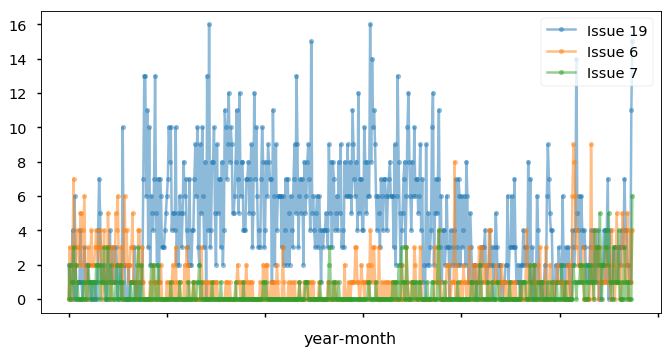

In [192]:
issues = np.random.choice(issues_per_month.keys(), 3)

issues_per_month[issues].plot(style='.-', figsize=(10,5), alpha=0.5);

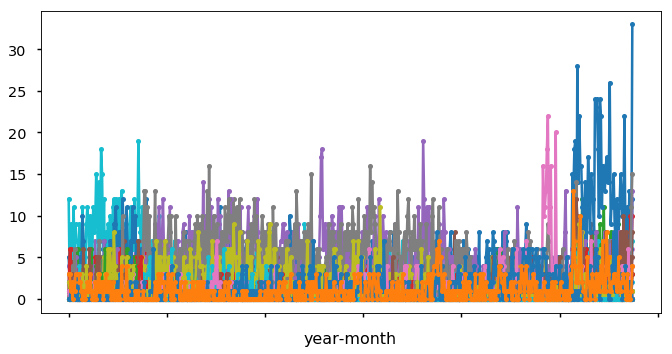

In [193]:
issues_per_month.plot(style='.-', figsize=(10,5), legend=False);

In [194]:
issues_per_date['year']  = issues_per_date.index.year
issues_per_year          = issues_per_date.groupby('year').sum()

del issues_per_date['year']
issues_per_year.head()

,Issue 1,Issue 2,Issue 3,Issue 4,Issue 5,Issue 6,Issue 7,Issue 8,Issue 9,Issue 10,...,Issue 24,Issue 26,Issue 27,Issue 28,Issue 29,Issue 30,Issue 31,Issue 32,Issue 33,Issue 34
year,,,,,,,,,,,,,,,,,,,,,
1960,6,3,18,14,38,29,10,16,0,87,...,14,2,7,15,15,2,7,0,10,26
1961,3,1,23,8,26,34,6,17,3,83,...,15,1,5,25,8,2,17,0,2,13
1962,7,2,26,14,42,29,14,22,0,122,...,19,4,3,19,8,1,14,0,2,12
1963,6,2,13,20,31,28,10,9,0,92,...,17,4,5,14,12,2,21,0,5,15
1964,10,3,14,23,44,40,7,19,1,94,...,18,8,3,17,10,0,15,0,10,13


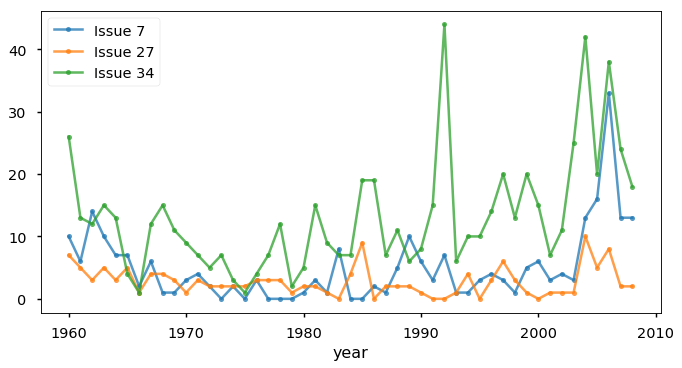

In [200]:
issues = np.random.choice(issues_per_year.keys(), 3)

issues_per_year[issues].plot(style='.-', figsize=(10,5), alpha=0.75);

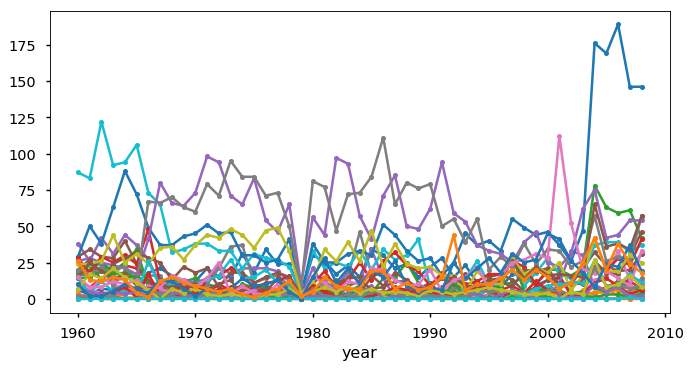

In [201]:
issues_per_year.plot(style='.-', figsize=(10,5), legend=False);

In [202]:
years  = [ d[:4] for d in list(issues_per_month.index) ]
months = [ d[-2:] for d in list(issues_per_month.index) ]

from collections import Counter
Counter(years)

Counter({'1960': 12,
         '1961': 12,
         '1962': 12,
         '1963': 12,
         '1964': 12,
         '1965': 12,
         '1966': 12,
         '1967': 12,
         '1968': 12,
         '1969': 12,
         '1970': 12,
         '1971': 12,
         '1972': 12,
         '1973': 12,
         '1974': 12,
         '1975': 12,
         '1976': 12,
         '1977': 12,
         '1978': 11,
         '1979': 2,
         '1980': 12,
         '1981': 12,
         '1982': 12,
         '1983': 12,
         '1984': 12,
         '1985': 12,
         '1986': 12,
         '1987': 12,
         '1988': 12,
         '1989': 12,
         '1990': 12,
         '1991': 11,
         '1992': 11,
         '1993': 12,
         '1994': 12,
         '1995': 12,
         '1996': 12,
         '1997': 12,
         '1998': 12,
         '1999': 12,
         '2000': 12,
         '2001': 12,
         '2002': 12,
         '2003': 12,
         '2004': 12,
         '2005': 12,
         '2006': 12,
         '2007

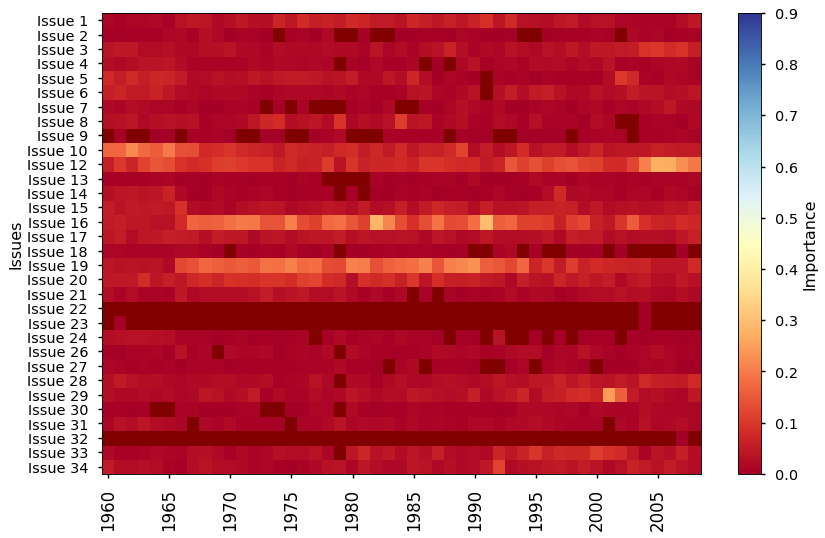

In [218]:
table = issues_per_year
M = table.as_matrix()

normM = []
for m in M:
    if sum(m)>0:
        normM += [ list(m/sum(m)) ]
    else:
        normM += [ list(m) ]
normM = np.array(normM)

fig, ax = plt.subplots(1, figsize=(11,7))

Mshow = np.flipud(normM.T)
Mshow[Mshow==0.0] = -1

pc = plt.pcolor(Mshow, cmap='RdYlBu')

#pc.cmap.set_under('rosybrown')
pc.cmap.set_under('maroon')
pc.set_clim(0,0.9)

c = plt.colorbar()
c.set_label('Importance')

keys = table.keys()
yticks = np.arange(len(keys))+0.5
yticklabels = keys[::-1]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=13)
ax.set_ylabel('Issues')

#xticks = np.arange(0,len(M),4)
#xticklabels = [ str(i) for i in np.arange(1985,2020,5) ]

xticks = np.arange(len(M))+0.5
allyears = np.array([i for i in table.index ])
ticks = np.arange(1960,2009,5)
xticks = xticks[np.array([np.where(allyears==y)[0][0] for y in ticks ])]
xticklabels = ticks

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=90, fontsize=15)
#ax.set_xlabel('Months')

plt.tight_layout()
#plt.savefig('images/GLES-MII-per-quarter.png', dpi=200)
plt.show()

In [392]:
# make the moving average year table
N = 5
table = issues_per_year.copy()

from collections import OrderedDict
new_df_dic = OrderedDict()

for key in table.keys():
    new_df_dic[key] = running_mean(table[key].values, N=N)

new_df_dic['year'] = table.index.values[int((N-1)/2):-int((N-1)/2)]

yearly_moving_average = pd.DataFrame(new_df_dic)
yearly_moving_average = yearly_moving_average.set_index('year')
yearly_moving_average.head()

,Issue 1,Issue 2,Issue 3,Issue 4,Issue 5,Issue 6,Issue 7,Issue 8,Issue 9,Issue 10,...,Issue 24,Issue 26,Issue 27,Issue 28,Issue 29,Issue 30,Issue 31,Issue 32,Issue 33,Issue 34
year,,,,,,,,,,,,,,,,,,,,,
1962,6.4,2.2,18.8,15.8,36.2,32.0,9.4,16.6,0.8,95.6,...,16.6,3.8,4.6,18.0,10.6,1.4,14.8,0.0,5.8,15.8
1963,5.8,2.8,18.4,17.2,36.0,31.0,8.8,16.8,1.0,99.4,...,16.6,3.6,4.2,16.8,10.2,1.0,15.6,0.0,5.2,11.4
1964,8.8,4.2,15.8,18.0,36.2,26.6,8.0,16.6,0.4,97.4,...,14.6,6.8,3.4,13.2,9.8,1.4,13.4,0.0,5.6,9.0
1965,11.6,4.4,12.2,16.2,29.8,22.6,6.4,15.4,0.8,86.0,...,11.6,6.6,3.6,11.2,9.8,2.0,10.6,0.0,7.8,9.0
1966,13.6,6.6,12.2,13.0,25.4,18.0,4.6,14.0,1.0,74.0,...,8.8,6.8,3.4,10.0,10.6,1.8,7.8,0.0,9.2,9.0


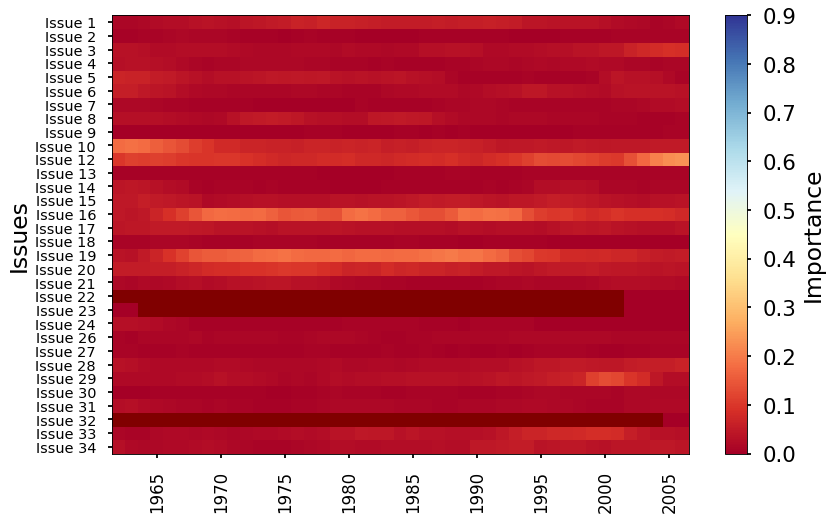

In [394]:
table = yearly_moving_average
M = table.as_matrix()

normM = []
for m in M:
    if sum(m)>0:
        normM += [ list(m/sum(m)) ]
    else:
        normM += [ list(m) ]
normM = np.array(normM)

fig, ax = plt.subplots(1, figsize=(11,7))

Mshow = np.flipud(normM.T)
Mshow[Mshow==0.0] = -1

pc = plt.pcolor(Mshow, cmap='RdYlBu')

#pc.cmap.set_under('rosybrown')
pc.cmap.set_under('maroon')
pc.set_clim(0,0.9)

c = plt.colorbar()
c.set_label('Importance')

keys = table.keys()
yticks = np.arange(len(keys))+0.5
yticklabels = keys[::-1]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=13)
ax.set_ylabel('Issues')

#xticks = np.arange(0,len(M),4)
#xticklabels = [ str(i) for i in np.arange(1985,2020,5) ]

xticks = np.arange(len(M))+0.5
allyears = np.array([i for i in table.index ])
ticks = np.arange(1965,2009,5)
xticks = xticks[np.array([np.where(allyears==y)[0][0] for y in ticks ])]
xticklabels = ticks

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=90, fontsize=15)
#ax.set_xlabel('Months')

plt.tight_layout()
#plt.savefig('images/GLES-MII-per-quarter.png', dpi=200)
plt.show()

In [ ]:
table = issues_per_month.copy()

# Add empty rows to issues_per_month
table.index
new_indices = []

for year in range(1960,2008):
    for month in range(1,13):
        year_month = str(year)+'-'+str(month).zfill(2)
        if year_month not in table.index:
            new_indices += [ year_month ]
            
d = pd.DataFrame( np.zeros((len(new_indices),len(table.keys()))),
                  columns=table.keys(),
                  index=new_indices )

table = table.append(d).sort_index()

In [238]:
def running_mean(x, N=5):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [249]:
# make the moving average month table
N = 5

from collections import OrderedDict
new_df_dic = OrderedDict()

for key in table.keys():
    new_df_dic[key] = running_mean(table[key].values, N=N)

new_df_dic['month-year'] = table.index.values[int((N-1)/2):-int((N-1)/2)]

monthly_moving_average = pd.DataFrame(new_df_dic)
monthly_moving_average = monthly_moving_average.set_index('month-year')
monthly_moving_average.head()

,Issue 1,Issue 2,Issue 3,Issue 4,Issue 5,Issue 6,Issue 7,Issue 8,Issue 9,Issue 10,...,Issue 24,Issue 26,Issue 27,Issue 28,Issue 29,Issue 30,Issue 31,Issue 32,Issue 33,Issue 34
month-year,,,,,,,,,,,,,,,,,,,,,
1960-03,0.8,0.2,1.4,1.0,3.6,1.4,0.8,1.0,0.0,6.8,...,1.4,0.0,0.4,1.4,1.0,0.0,0.4,0.0,0.6,1.8
1960-04,1.2,0.4,1.2,1.4,3.0,2.8,1.4,0.6,0.0,6.6,...,1.4,0.0,0.2,1.8,1.0,0.2,0.6,0.0,0.6,1.6
1960-05,1.2,0.6,1.6,1.6,2.6,2.6,1.0,1.0,0.0,7.2,...,1.2,0.0,0.2,1.6,1.4,0.4,0.8,0.0,0.6,1.2
1960-06,1.0,0.4,1.2,1.8,3.0,2.6,1.4,1.6,0.0,7.2,...,1.0,0.0,0.2,1.8,1.8,0.4,1.0,0.0,0.6,1.6
1960-07,0.8,0.4,1.0,1.6,3.0,3.2,1.2,1.2,0.0,7.6,...,1.0,0.0,0.2,1.2,1.4,0.4,0.8,0.0,0.8,1.8


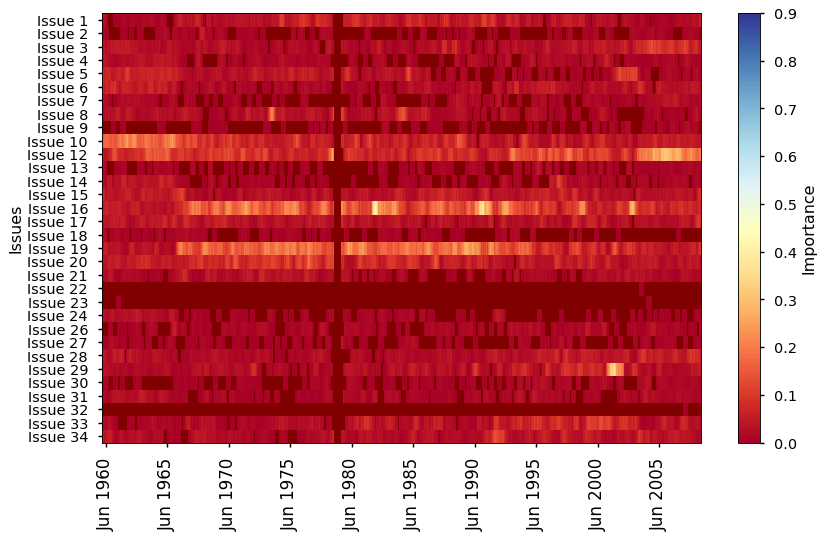

In [257]:
#table = issues_per_month.copy()
table = monthly_moving_average.copy()
M = table.as_matrix()

normM = []
for m in M:
    if sum(m)>0:
        normM += [ list(m/sum(m)) ]
    else:
        normM += [ list(m) ]
normM = np.array(normM)

fig, ax = plt.subplots(1, figsize=(11,7))

Mshow = np.flipud(normM.T)
Mshow[Mshow==0.0] = -1

pc = plt.pcolor(Mshow, cmap='RdYlBu')

#pc.cmap.set_under('rosybrown')
pc.cmap.set_under('maroon')
pc.set_clim(0,0.9)

c = plt.colorbar()
c.set_label('Importance')

keys = table.keys()
yticks = np.arange(len(keys))+0.5
yticklabels = keys[::-1]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=13)
ax.set_ylabel('Issues')

xticks = np.arange(len(M))+0.5
allyears = np.array([i for i in table.index ])
ticks = [ str(i)+'-06' for i in np.arange(1960,2009,5) ]
xticks = xticks[np.array([np.where(allyears==y)[0][0] for y in ticks ])]
xticklabels = ticks = [ 'Jun '+str(i) for i in np.arange(1960,2009,5) ]

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=90, fontsize=15)
#ax.set_xlabel('Months')

plt.tight_layout()
#plt.savefig('images/GLES-MII-per-quarter.png', dpi=200)
plt.show()

# Next bit: analysis

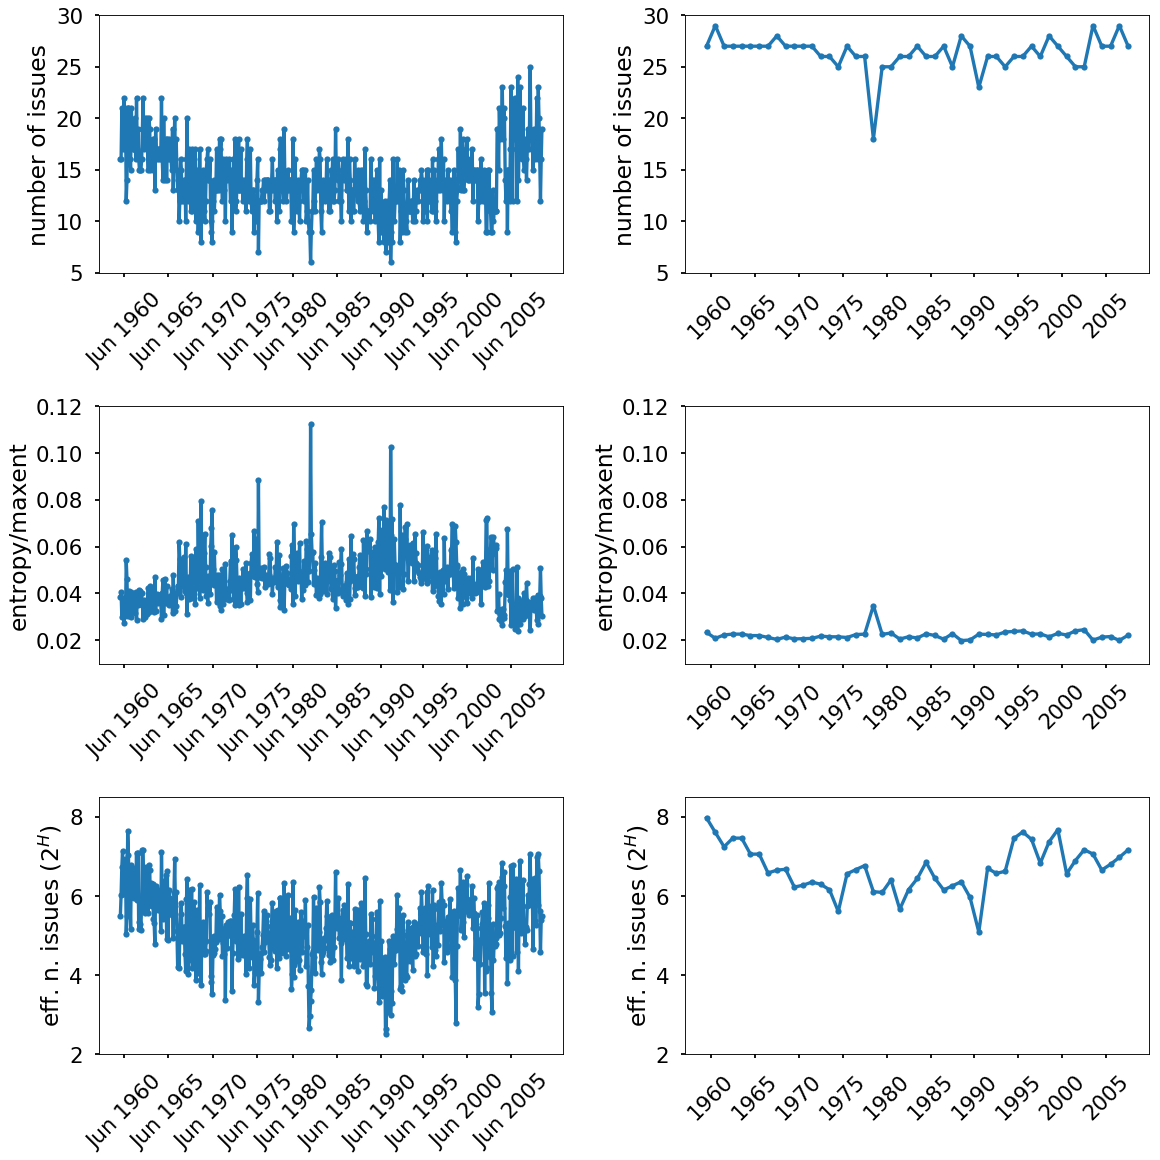

In [300]:
sns.set_context('poster', rc={"lines.linewidth": 3}, font_scale=1.2)

fig, axs = plt.subplots(3,2,figsize=(15,15))
axs = axs.flatten()

for scale in ['month', 'year']:

    if scale == 'month':
        table = issues_per_month
        #table = monthly_moving_average
        xticks = np.arange(len(M))+0.5
        allyears = np.array([i for i in table.index ])
        ticks = [ str(i)+'-06' for i in np.arange(1960,2009,5) ]
        xticks = xticks[np.array([np.where(allyears==y)[0][0] for y in ticks ])]
        xticklabels = ticks = [ 'Jun '+str(i) for i in np.arange(1960,2009,5) ]
        axs_part = axs[[0,2,4]]

    elif scale == 'year':
        table = issues_per_year
        xticks = 1960 + np.arange(len(M))+0.5
        allyears = np.array([i for i in table.index ])
        ticks = np.arange(1960,2009,5)
        xticks = xticks[np.array([np.where(allyears==y)[0][0] for y in ticks ])]
        xticklabels = ticks
        axs_part = axs[[1,3,5]]

    all_entropies = []
    n_issues = []
    
    for index, row in table.iterrows():
        topic_array = np.array(row.values[1:],dtype=np.float64)
        all_entropies += [ entropy(topic_array) ]
        n_issues      += [ sum(row.values[1:]>0) ]

    all_entropies = np.array(all_entropies)
    n_issues      = np.array(n_issues)

    ys = [ [ n                if n>0 else -np.inf for s,n in zip(all_entropies, n_issues) ],
           [ s/(n*np.log2(n)) if n>0 else -np.inf for s,n in zip(all_entropies, n_issues) ],
           [ 2**s             if n>0 else -np.inf for s,n in zip(all_entropies, n_issues) ]
         ]

    ylabels = ['number of issues', 'entropy/maxent', r'eff. n. issues ($2^H$)']
    
    ylims = [ (5,30), (0.010,0.12), (2,8.5) ]
    
    for ax,y,ylabel,ylim in zip(axs_part,ys,ylabels,ylims):
        ax.plot(table.index, y, '.-')
        ax.set_ylabel(ylabel)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabels, rotation=45)
        ax.set_ylim(ylim)

plt.tight_layout()
#plt.savefig('images/entropy.png', dpi=200)
plt.show()

In [301]:
from numpy.linalg import norm
from scipy.stats import entropy
from scipy.spatial.distance import hamming
from scipy.spatial.distance import euclidean
from sklearn.metrics import mutual_info_score

def rel_entr(p, q, ep=0.01, fill_all_zeros=True):
    if fill_all_zeros is True:
        P = [ i if i > 0 else ep for i in p ]
        Q = [ i if i > 0 else ep for i in q ]
        return entropy(P,Q)
    
    else:
        P = []
        Q = []
        for i in range(len(p)):
            
            if p[i] == 0:
                if q[i] != 0:
                    P += [ep]
                    Q += [q[i]]
                else: # q[i] == 0
                    P += [p[i]]
                    Q += [q[i]]
                    continue
                    
            else:# p[i] != 0
                if q[i] != 0:
                    P += [p[i]]
                    Q += [q[i]]
                else: # q[i] == 0
                    P += [p[i]]
                    Q += [ep]
                    
        return entropy(P,Q)


def JSD(P, Q,ep=0.01, fill_all_zeros=True):
    _P = P / norm(P, ord=1)
    _Q = Q / norm(Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (rel_entr(_P, _M,ep=ep,fill_all_zeros=fill_all_zeros) + rel_entr(_Q, _M,ep=ep,fill_all_zeros=fill_all_zeros))


def BCD(P,Q):
    _P = np.array(P / norm(P, ord=1),dtype=np.float32)
    _Q = np.array(Q / norm(Q, ord=1),dtype=np.float32)
    BC = np.dot(np.sqrt(_P),np.sqrt(_Q))
    
    return -np.log2(BC)    


def MI(_P,_Q):
    return mutual_info_score(_P,_Q)


def novelty(p,q,metric='KL', ep=0.01, faz=True):
    
    if metric=='KL':
        return rel_entr(p,q,ep=ep,fill_all_zeros=faz)
    elif metric=='hamming':
        return hamming(p>0,q>0)
    elif metric=='euclidean':
        return euclidean(p,q)
    elif metric=='JSD':
        return JSD(p,q,ep=ep,fill_all_zeros=faz)
    elif metric=='BCD':
        return BCD(p,q)
    elif metric=='MI':
        return MI(p,q)
    else:
        return 0

In [ ]:
sns.set_context('poster', rc={"lines.linewidth": 3}, font_scale=1.2)

fig, axs = plt.subplots(3,2,figsize=(15,15))
axs = axs.flatten()

for scale in ['month', 'year']:

    if scale == 'month':
        table = issues_per_month
        #table = monthly_moving_average
        xticks = np.arange(len(M))+0.5
        allyears = np.array([i for i in table.index ])
        ticks = [ str(i)+'-06' for i in np.arange(1960,2009,5) ]
        xticks = xticks[np.array([np.where(allyears==y)[0][0] for y in ticks ])]
        xticklabels = ticks = [ 'Jun '+str(i) for i in np.arange(1960,2009,5) ]
        axs_part = axs[[0,2,4]]

    elif scale == 'year':
        #table = issues_per_year
        table = yearly_moving_average.copy()
        xticks = 1960 + np.arange(len(M))+0.5
        allyears = np.array([i for i in table.index ])
        ticks = np.arange(1960,2009,5)
        xticks = xticks[np.array([np.where(allyears==y)[0][0] for y in ticks ])]
        xticklabels = ticks
        axs_part = axs[[1,3,5]]

    all_entropies = []
    n_issues = []
    
    for index, row in table.iterrows():
        topic_array = np.array(row.values[1:],dtype=np.float64)
        all_entropies += [ entropy(topic_array) ]
        n_issues      += [ sum(row.values[1:]>0) ]

    all_entropies = np.array(all_entropies)
    n_issues      = np.array(n_issues)

    ys = [ [ n                if n>0 else -np.inf for s,n in zip(all_entropies, n_issues) ],
           [ s/(n*np.log2(n)) if n>0 else -np.inf for s,n in zip(all_entropies, n_issues) ],
           [ 2**s             if n>0 else -np.inf for s,n in zip(all_entropies, n_issues) ]
         ]

    ylabels = ['number of issues', 'entropy/maxent', r'eff. n. issues ($2^H$)']
    
    ylims = [ (5,30), (0.010,0.12), (2,8.5) ]
    
    for ax,y,ylabel,ylim in zip(axs_part,ys,ylabels,ylims):
        ax.plot(table.index, y, '.-')
        ax.set_ylabel(ylabel)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabels, rotation=45)
        ax.set_ylim(ylim)

plt.tight_layout()
#plt.savefig('images/entropy.png', dpi=200)
plt.show()

In [420]:
novelties = {}
for scale in ['month', 'year']:

    if scale == 'month':
        #table = issues_per_month
        table = monthly_moving_average.copy()
        xticks = np.arange(len(table))+0.5
        allyears = np.array([i for i in table.index ])
        ticks = [ str(i)+'-06' for i in np.arange(1960,2009,5) ]
        xticks = xticks[np.array([np.where(allyears==y)[0][0] for y in ticks ])]
        xticklabels = ticks = [ 'Jun '+str(i) for i in np.arange(1960,2009,5) ]
        axs_part = axs[[0,2,4]]

    elif scale == 'year':
        table = yearly_moving_average.copy()
        del table['Issue 22'], table['Issue 23'], table['Issue 32']
        #del table['Issue 23']
        #del table['Issue 32']
        xticks = 1965 + np.arange(len(table))+0.5
        allyears = np.array([i for i in table.index ])
        ticks = np.arange(1965,2009,5)
        xticks = xticks[np.array([np.where(allyears==y)[0][0] for y in ticks ])]
        xticklabels = ticks
        axs_part = axs[[1,3,5]]

    issues_tplus1 = table[table.index>=table.index[windowsize]]

    eps = [0.001, 0.01, 0.1, 0.2]
    KLs_faz_True = {}
    KLs_faz_False = {}
    JSDs = {}

    for ep in eps:
        relative_entropies_True = []
        relative_entropies_False = []
        relative_entropies_hamm = []
        jensen = []
        bhatta = []
        mutual = []

        j_index = 1
        for index, row in issues_tplus1.iterrows():

            y1 = table.iloc[j_index-1].values
            y2 = row.values
            j_index += 1

            relative_entropies_True  += [ novelty(y2, y1, metric='KL', ep=ep, faz=True) ]
            relative_entropies_False += [ novelty(y2, y1, metric='KL', ep=ep, faz=False) ]
            jensen += [ novelty(y2, y1, metric='JSD', ep=ep, faz=False) ]

        KLs_faz_True[ep]  = relative_entropies_True
        KLs_faz_False[ep] = relative_entropies_False
        JSDs[ep]          = jensen
        
    all_novelties = {
                    'KL_True':KLs_faz_True,
                    'KL_False':KLs_faz_False,
                    'JSDs':JSDs
                    }
    
    novelties[scale] = all_novelties

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/scipy/stats/_distn_infrastructure.py:2508: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)
/usr/local/lib/python3.5/dist-packages/scipy/stats/_distn_infrastructure.py:2515: RuntimeWarning: invalid value encountered in true_divide
  qk = 1.0*qk / np.sum(qk, axis=0)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


ep = 0.001


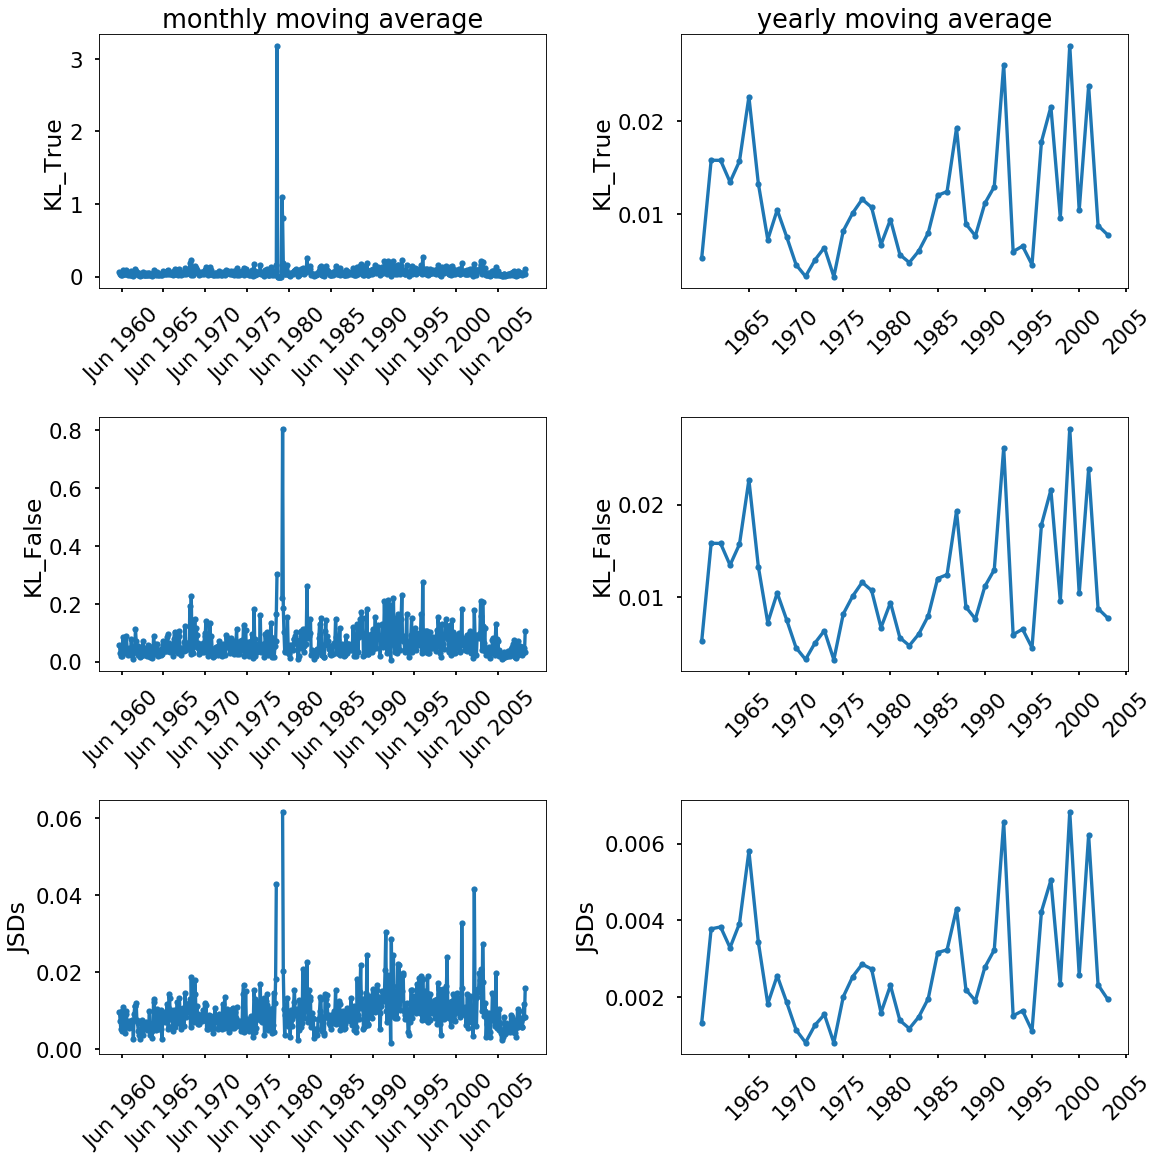

In [454]:
sns.set_context('poster', rc={"lines.linewidth": 3}, font_scale=1.2)

fig, axs = plt.subplots(3,2,figsize=(15,15))
axs = axs.flatten()

eps = [0.001, 0.01, 0.1, 0.2]
ep  = eps[0]

for scale in ['month', 'year']:
    #all_novelties = novelties[scale]
    #KL_True  = all_novelties['KL_True']
    #KL_False = all_novelties['KL_False']
    #JSDs     = all_novelties['JSDs']
    
    if scale == 'month':       
        #table = issues_per_month
        table = monthly_moving_average
        xticks = np.arange(len(table)-1)
        allyears = np.array([i for i in table.index ])
        ticks = [ str(i)+'-06' for i in np.arange(1960,2009,5) ]
        xticks = xticks[np.array([np.where(allyears==y)[0][0] for y in ticks ])]
        xticklabels = ticks = [ 'Jun '+str(i) for i in np.arange(1960,2009,5) ]
        axs_part = axs[[0,2,4]]

    elif scale == 'year':
        #table = issues_per_year
        table = yearly_moving_average.copy()
        del table['Issue 22'], table['Issue 23'], table['Issue 32']
        #del table['Issue 23']
        #del table['Issue 32']
        xticks = 1965 + np.arange(len(table))
        allyears = np.array([i for i in table.index ])
        ticks = np.arange(1965,2009,5)
        xticks = xticks[np.array([np.where(allyears==y)[0][0] for y in ticks ])]
        xticklabels = ticks
        axs_part = axs[[1,3,5]]

    ys = [ novelties[scale][key] for key in [ 'KL_True', 'KL_False', 'JSDs'] ]

    ylabels = [ 'KL_True', 'KL_False', 'JSDs' ]
    
    ylims = [ (5,30), (0.010,0.12), (2,8.5) ]
    
    axs_part[0].set_title('%sly moving average' % scale)
    for ax,y,ylabel,ylim in zip(axs_part,ys,ylabels,ylims):
        ax.plot(table.index[1:], y[ep], '.-')
        ax.set_ylabel(ylabel)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabels, rotation=45)
        #ax.set_ylim(ylim)
    
print('ep = %g' % ep)

plt.tight_layout()
#plt.savefig('images/entropy.png', dpi=200)
plt.show()